In [7]:
import requests
from bs4 import BeautifulSoup

from datetime import datetime, timedelta

In [8]:
import pandas as pd
import numpy as np

In [9]:
import time

In [10]:
import matplotlib.pyplot as plt

In [14]:
!wget -N https://raw.githubusercontent.com/heisendelta/vleague-japan-analysis/refs/heads/sv_league/data/unfinished_matches.csv
!wget -N https://raw.githubusercontent.com/heisendelta/vleague-japan-analysis/refs/heads/sv_league/data/unfinished_matches_with_scores.csv
!wget -N https://raw.githubusercontent.com/heisendelta/vleague-japan-analysis/refs/heads/sv_league/data/venues.csv

--2025-01-13 07:06:52--  https://raw.githubusercontent.com/heisendelta/vleague-japan-analysis/refs/heads/sv_league/data/unfinished_matches.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6195 (6.0K) [text/plain]
Saving to: ‘unfinished_matches.csv’

unfinished_matches. 100%[===================>]   6.05K  --.-KB/s    in 0s      

Last-modified header missing -- time-stamps turned off.
2025-01-13 07:06:52 (76.7 MB/s) - ‘unfinished_matches.csv’ saved [6195/6195]

--2025-01-13 07:06:52--  https://raw.githubusercontent.com/heisendelta/vleague-japan-analysis/refs/heads/sv_league/data/unfinished_matches_with_scores.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githu

In [15]:
unfinished_matches = pd.read_csv('unfinished_matches_with_scores.csv')
unfinished_matches['mean_score'] = unfinished_matches[[
    c for c in unfinished_matches.columns if c.startswith('predicted_score')]].mean(axis=1)
# unfinished_matches['score'] = 1 / unfinished_matches['mean_score']
unfinished_matches['score'] = 1 / unfinished_matches['predicted_score_method2'] # refer to previous nb, this is the best metric
unfinished_matches = unfinished_matches[['date', 'home_team', 'away_team', 'venue', 'score']]

venues = pd.read_csv('venues.csv').replace('-', pd.NA).dropna()
venues['time'] = venues['time'].apply(lambda x: datetime.strptime(x, '%Hh%Mm').time())

In [16]:
unfinished_matches

,date,home_team,away_team,venue,score
0,2025-03-02T14:05,Tokyo GB,OSAKA B,Ariake Coliseum,-8435.786249
1,2025-03-01T15:05,Tokyo GB,OSAKA B,Ariake Coliseum,-8435.786249
2,2025-02-08T13:05,SUNTORY,WD NAGOYA,Asue Arena Osaka,-165.119090
3,2025-02-09T13:05,SUNTORY,WD NAGOYA,Asue Arena Osaka,-165.119090
4,2025-02-01T12:05,SUNTORY,STINGS AICHI,Ookini Arena Maishima,37.968157
...,...,...,...,...,...
101,2025-01-19T16:05,WD NAGOYA,VC NAGANO,ENTRIO,1.130111
102,2025-02-08T14:05,OSAKA B,VC NAGANO,Panasonic Arena,1.000000
103,2025-02-09T14:05,OSAKA B,VC NAGANO,Panasonic Arena,1.000000
104,2025-02-01T15:35,WD NAGOYA,TRshizuoka,ENTRIO,1.868475


In [17]:
match_with_venues = unfinished_matches.merge(venues, on='venue', how='left').dropna(axis=0)
match_with_venues['date'] = match_with_venues['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M'))
match_with_venues['cost'] = match_with_venues['cost'].apply(int)

match_with_venues

,date,home_team,away_team,venue,score,cost,time,latitude,longitude
0,2025-03-02 14:05:00,Tokyo GB,OSAKA B,Ariake Coliseum,-8435.786249,420,00:48:00,35.6364746,139.7900954
1,2025-03-01 15:05:00,Tokyo GB,OSAKA B,Ariake Coliseum,-8435.786249,420,00:48:00,35.6364746,139.7900954
2,2025-02-08 13:05:00,SUNTORY,WD NAGOYA,Asue Arena Osaka,-165.119090,15220,03:55:00,34.6594505,135.4447072
3,2025-02-09 13:05:00,SUNTORY,WD NAGOYA,Asue Arena Osaka,-165.119090,15220,03:55:00,34.6594505,135.4447072
4,2025-02-01 12:05:00,SUNTORY,STINGS AICHI,Ookini Arena Maishima,37.968157,15140,04:20:00,34.6655169,135.3976399
...,...,...,...,...,...,...,...,...,...
101,2025-01-19 16:05:00,WD NAGOYA,VC NAGANO,ENTRIO,1.130111,11510,02:34:00,35.2544957,136.821736
102,2025-02-08 14:05:00,OSAKA B,VC NAGANO,Panasonic Arena,1.000000,14970,03:50:00,34.8003061,135.6442713
103,2025-02-09 14:05:00,OSAKA B,VC NAGANO,Panasonic Arena,1.000000,14970,03:50:00,34.8003061,135.6442713
104,2025-02-01 15:35:00,WD NAGOYA,TRshizuoka,ENTRIO,1.868475,11510,02:34:00,35.2544957,136.821736


In [18]:
a = 1 # arbitrary constant for scaling

match_with_venues_copy = match_with_venues.copy()
match_with_venues_copy['score_per_cost'] = (a * abs(match_with_venues_copy['score'])) / match_with_venues_copy['cost']

match_with_venues_copy_copy = match_with_venues_copy[['date', 'home_team', 'away_team', 'score', 'cost', 'score_per_cost']].copy()
match_with_venues_copy_copy['score_abs'] = abs(match_with_venues_copy_copy['score'])
match_with_venues_copy_copy = match_with_venues_copy_copy.sort_values(by='score_abs', ascending=False)

quartiles = 5
quartile_range = np.arange(0, 101, 100 // quartiles) / 100

quartiles_df = match_with_venues_copy_copy[
    match_with_venues_copy_copy['score_abs'].isin(match_with_venues_copy_copy['score_abs'].quantile(quartile_range))]
quartiles_df

,date,home_team,away_team,score,cost,score_per_cost,score_abs
0,2025-03-02 14:05:00,Tokyo GB,OSAKA B,-8435.786249,420,20.085205,8435.786249
1,2025-03-01 15:05:00,Tokyo GB,OSAKA B,-8435.786249,420,20.085205,8435.786249
22,2025-03-16 14:05:00,Tokyo GB,SUNTORY,-10.090138,360,0.028028,10.090138
23,2025-03-15 15:05:00,Tokyo GB,SUNTORY,-10.090138,360,0.028028,10.090138
51,2025-04-05 13:05:00,OSAKA B,SUNTORY,4.854876,15140,0.000321,4.854876
50,2025-04-06 13:05:00,OSAKA B,SUNTORY,4.854876,15140,0.000321,4.854876
53,2025-03-08 13:05:00,SUNTORY,OSAKA B,-4.854876,15140,0.000321,4.854876
52,2025-03-09 13:05:00,SUNTORY,OSAKA B,-4.854876,15140,0.000321,4.854876
88,2025-03-15 14:05:00,TRshizuoka,STINGS AICHI,-3.349352,6840,0.000490,3.349352
89,2025-03-16 14:05:00,TRshizuoka,STINGS AICHI,-3.349352,6840,0.000490,3.349352


In [19]:
# Making the scores linear
sorted_scores = np.partition(match_with_venues_copy_copy['score_abs'].unique(), 1)
slope = sorted_scores[1] - sorted_scores[0]

match_with_venues_copy_copy['score_linear'] = match_with_venues_copy_copy['score_abs'].apply(
    lambda x: np.where(sorted_scores == x)[0][0] * slope + sorted_scores.min())

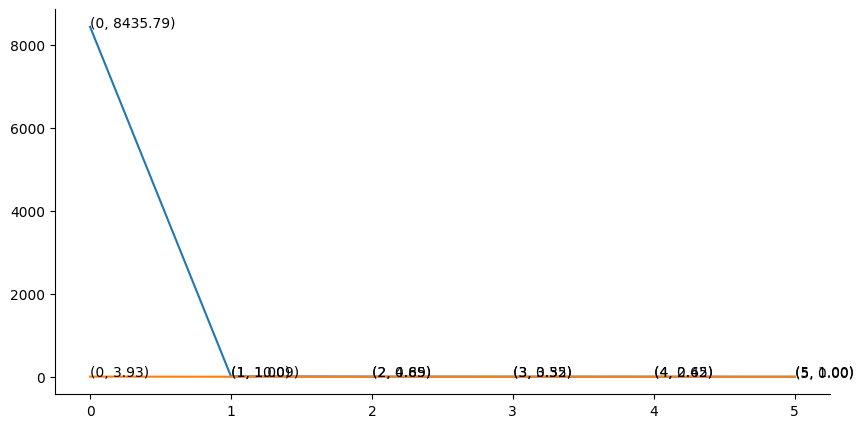

In [20]:
y = quartiles_df['score_abs'].unique()
x = np.arange(len(y))

assert (y != 0).all()
y_scaled = np.log(y) / np.log(10)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
ax.plot(x, y)
ax.plot(x, y_scaled)

for i_x, i_y in zip(x, y):
    plt.text(i_x, i_y, f'({i_x}, {i_y:.2f})')
for i_x, i_y in zip(x, y_scaled):
    plt.text(i_x, i_y, f'({i_x}, {i_y:.2f})')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [21]:
match_with_venues.loc[
    match_with_venues
        .sort_values(by=['cost', 'score', 'date'], ascending=[True, False, True])[['cost', 'score']]
        .drop_duplicates(keep='first', inplace=False)
        .index
].drop(['latitude', 'longitude'], axis=1, errors='ignore')

,date,home_team,away_team,venue,score,cost,time
84,2025-04-05 15:05:00,Tokyo GB,SAKAI,Yoyogi National Stadium 2nd Gymnasium,3.725231,260,00:49:00
73,2025-02-19 19:05:00,Tokyo GB,TRshizuoka,Yoyogi National Stadium 2nd Gymnasium,3.170122,260,00:49:00
23,2025-03-15 15:05:00,Tokyo GB,SUNTORY,Tokyo Metropolitan Gymnasium,-10.090138,360,00:41:00
38,2025-02-08 15:05:00,Tokyo GB,HIROSHIMA,Ariake Coliseum,6.048425,420,00:48:00
82,2025-01-18 15:05:00,Tokyo GB,SAKAI,Ariake Coliseum,3.725231,420,00:48:00
1,2025-03-01 15:05:00,Tokyo GB,OSAKA B,Ariake Coliseum,-8435.786249,420,00:48:00
70,2025-03-22 15:05:00,Tokyo GB,TRshizuoka,Musashino Forest Sport Plaza,3.170122,640,01:25:00
18,2025-04-05 12:00:00,TRshizuoka,HIROSHIMA,TBC,-13.646482,670,01:16:00
67,2025-01-18 14:05:00,TRshizuoka,OSAKA B,Koryo Arena,-2.743335,4810,01:53:00
9,2025-02-08 14:05:00,TRshizuoka,SAKAI,Koryo Arena,-12.277003,4810,01:53:00


In [22]:
match_with_venues_copy = match_with_venues_copy.sort_values(by='score_per_cost', ascending=False)
# match_with_venues_copy.drop(['time', 'latitude', 'longitude'], axis=1).head(20) # shows matches between the same teams consecutively
match_without_duplicates = match_with_venues_copy.loc[
    match_with_venues_copy[['home_team', 'away_team']].drop_duplicates(keep='first', inplace=False).index]
match_without_duplicates.head(10)

,date,home_team,away_team,venue,score,cost,time,latitude,longitude,score_per_cost
0,2025-03-02 14:05:00,Tokyo GB,OSAKA B,Ariake Coliseum,-8435.786249,420,00:48:00,35.6364746,139.7900954,20.085205
23,2025-03-15 15:05:00,Tokyo GB,SUNTORY,Tokyo Metropolitan Gymnasium,-10.090138,360,00:41:00,35.6797364,139.7124051,0.028028
18,2025-04-05 12:00:00,TRshizuoka,HIROSHIMA,TBC,-13.646482,670,01:16:00,34.9883548,138.4267418,0.020368
39,2025-02-09 14:05:00,Tokyo GB,HIROSHIMA,Ariake Coliseum,6.048425,420,00:48:00,35.6364746,139.7900954,0.014401
84,2025-04-05 15:05:00,Tokyo GB,SAKAI,Yoyogi National Stadium 2nd Gymnasium,3.725231,260,00:49:00,35.6664637,139.6985798,0.014328
73,2025-02-19 19:05:00,Tokyo GB,TRshizuoka,Yoyogi National Stadium 2nd Gymnasium,3.170122,260,00:49:00,35.6664637,139.6985798,0.012193
2,2025-02-08 13:05:00,SUNTORY,WD NAGOYA,Asue Arena Osaka,-165.119090,15220,03:55:00,34.6594505,135.4447072,0.010849
7,2025-03-29 14:05:00,TRshizuoka,VC NAGANO,Konohana Arena,-20.966260,6840,02:04:00,34.9883548,138.4267418,0.003065
9,2025-02-08 14:05:00,TRshizuoka,SAKAI,Koryo Arena,-12.277003,4810,01:53:00,35.0953586,138.8646897,0.002552
4,2025-02-01 12:05:00,SUNTORY,STINGS AICHI,Ookini Arena Maishima,37.968157,15140,04:20:00,34.6655169,135.3976399,0.002508


In [23]:
match_with_venues.sort_values(by=['cost', 'score'], ascending=[True, False]).head(10)

,date,home_team,away_team,venue,score,cost,time,latitude,longitude
84,2025-04-05 15:05:00,Tokyo GB,SAKAI,Yoyogi National Stadium 2nd Gymnasium,3.725231,260,00:49:00,35.6664637,139.6985798
85,2025-04-06 14:05:00,Tokyo GB,SAKAI,Yoyogi National Stadium 2nd Gymnasium,3.725231,260,00:49:00,35.6664637,139.6985798
72,2025-02-20 19:05:00,Tokyo GB,TRshizuoka,Yoyogi National Stadium 2nd Gymnasium,3.170122,260,00:49:00,35.6664637,139.6985798
73,2025-02-19 19:05:00,Tokyo GB,TRshizuoka,Yoyogi National Stadium 2nd Gymnasium,3.170122,260,00:49:00,35.6664637,139.6985798
22,2025-03-16 14:05:00,Tokyo GB,SUNTORY,Tokyo Metropolitan Gymnasium,-10.090138,360,00:41:00,35.6797364,139.7124051
23,2025-03-15 15:05:00,Tokyo GB,SUNTORY,Tokyo Metropolitan Gymnasium,-10.090138,360,00:41:00,35.6797364,139.7124051
38,2025-02-08 15:05:00,Tokyo GB,HIROSHIMA,Ariake Coliseum,6.048425,420,00:48:00,35.6364746,139.7900954
39,2025-02-09 14:05:00,Tokyo GB,HIROSHIMA,Ariake Coliseum,6.048425,420,00:48:00,35.6364746,139.7900954
82,2025-01-18 15:05:00,Tokyo GB,SAKAI,Ariake Coliseum,3.725231,420,00:48:00,35.6364746,139.7900954
83,2025-01-19 14:05:00,Tokyo GB,SAKAI,Ariake Coliseum,3.725231,420,00:48:00,35.6364746,139.7900954


In [24]:
match_with_venues.loc[
    match_with_venues
        .sort_values(by=['cost', 'score', 'date'], ascending=[True, False, True])[['cost', 'score']]
        .drop_duplicates(keep='first', inplace=False)
        .index
].drop(['latitude', 'longitude'], axis=1, errors='ignore')

,date,home_team,away_team,venue,score,cost,time
84,2025-04-05 15:05:00,Tokyo GB,SAKAI,Yoyogi National Stadium 2nd Gymnasium,3.725231,260,00:49:00
73,2025-02-19 19:05:00,Tokyo GB,TRshizuoka,Yoyogi National Stadium 2nd Gymnasium,3.170122,260,00:49:00
23,2025-03-15 15:05:00,Tokyo GB,SUNTORY,Tokyo Metropolitan Gymnasium,-10.090138,360,00:41:00
38,2025-02-08 15:05:00,Tokyo GB,HIROSHIMA,Ariake Coliseum,6.048425,420,00:48:00
82,2025-01-18 15:05:00,Tokyo GB,SAKAI,Ariake Coliseum,3.725231,420,00:48:00
1,2025-03-01 15:05:00,Tokyo GB,OSAKA B,Ariake Coliseum,-8435.786249,420,00:48:00
70,2025-03-22 15:05:00,Tokyo GB,TRshizuoka,Musashino Forest Sport Plaza,3.170122,640,01:25:00
18,2025-04-05 12:00:00,TRshizuoka,HIROSHIMA,TBC,-13.646482,670,01:16:00
67,2025-01-18 14:05:00,TRshizuoka,OSAKA B,Koryo Arena,-2.743335,4810,01:53:00
9,2025-02-08 14:05:00,TRshizuoka,SAKAI,Koryo Arena,-12.277003,4810,01:53:00


In [25]:
a = 1

match_with_venues_copy_copy['score_per_cost'] = (a * abs(match_with_venues_copy_copy['score_linear'])) / match_with_venues_copy_copy['cost']
match_with_venues_copy_copy.sort_values(by='score_per_cost', ascending=False).head(50)

,date,home_team,away_team,score,cost,score_per_cost,score_abs,score_linear
73,2025-02-19 19:05:00,Tokyo GB,TRshizuoka,3.170122,260,0.017358,3.170122,4.512997
72,2025-02-20 19:05:00,Tokyo GB,TRshizuoka,3.170122,260,0.017358,3.170122,4.512997
84,2025-04-05 15:05:00,Tokyo GB,SAKAI,3.725231,260,0.015356,3.725231,3.992553
85,2025-04-06 14:05:00,Tokyo GB,SAKAI,3.725231,260,0.015356,3.725231,3.992553
0,2025-03-02 14:05:00,Tokyo GB,OSAKA B,-8435.786249,420,0.014463,8435.786249,6.074329
1,2025-03-01 15:05:00,Tokyo GB,OSAKA B,-8435.786249,420,0.014463,8435.786249,6.074329
83,2025-01-19 14:05:00,Tokyo GB,SAKAI,3.725231,420,0.009506,3.725231,3.992553
82,2025-01-18 15:05:00,Tokyo GB,SAKAI,3.725231,420,0.009506,3.725231,3.992553
71,2025-03-23 14:05:00,Tokyo GB,TRshizuoka,3.170122,640,0.007052,3.170122,4.512997
70,2025-03-22 15:05:00,Tokyo GB,TRshizuoka,3.170122,640,0.007052,3.170122,4.512997


## Clustering

In [26]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [27]:
match_with_venues_copy = match_with_venues.copy()

match_with_venues_copy['date_numeric'] = (pd.to_datetime(match_with_venues_copy['date']) - pd.to_datetime(match_with_venues_copy['date']).min())
match_with_venues_copy['date_numeric'] = match_with_venues_copy['date_numeric'].dt.total_seconds() / (60 * 60 * 24)

In [28]:
features = match_with_venues_copy[['latitude', 'longitude', 'date_numeric']]

scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)

db = DBSCAN(eps=0.5, min_samples=2, metric='euclidean')
match_with_venues_copy['cluster'] = db.fit_predict(normalized_features)

match_with_venues_copy

,date,home_team,away_team,venue,score,cost,time,latitude,longitude,date_numeric,cluster
0,2025-03-02 14:05:00,Tokyo GB,OSAKA B,Ariake Coliseum,-8435.786249,420,00:48:00,35.6364746,139.7900954,43.000000,0
1,2025-03-01 15:05:00,Tokyo GB,OSAKA B,Ariake Coliseum,-8435.786249,420,00:48:00,35.6364746,139.7900954,42.041667,0
2,2025-02-08 13:05:00,SUNTORY,WD NAGOYA,Asue Arena Osaka,-165.119090,15220,03:55:00,34.6594505,135.4447072,20.958333,1
3,2025-02-09 13:05:00,SUNTORY,WD NAGOYA,Asue Arena Osaka,-165.119090,15220,03:55:00,34.6594505,135.4447072,21.958333,1
4,2025-02-01 12:05:00,SUNTORY,STINGS AICHI,Ookini Arena Maishima,37.968157,15140,04:20:00,34.6655169,135.3976399,13.916667,1
...,...,...,...,...,...,...,...,...,...,...,...
101,2025-01-19 16:05:00,WD NAGOYA,VC NAGANO,ENTRIO,1.130111,11510,02:34:00,35.2544957,136.821736,1.083333,21
102,2025-02-08 14:05:00,OSAKA B,VC NAGANO,Panasonic Arena,1.000000,14970,03:50:00,34.8003061,135.6442713,21.000000,1
103,2025-02-09 14:05:00,OSAKA B,VC NAGANO,Panasonic Arena,1.000000,14970,03:50:00,34.8003061,135.6442713,22.000000,1
104,2025-02-01 15:35:00,WD NAGOYA,TRshizuoka,ENTRIO,1.868475,11510,02:34:00,35.2544957,136.821736,14.062500,6


In [29]:
from IPython.display import display, HTML

In [30]:
clustered_matches = match_with_venues_copy.groupby('cluster')
for cluster, matches in clustered_matches:
    if len(matches) > 2:
        if cluster == -1:
            print("\nOutliers:")
        else:
            print(f"\nCluster {cluster}:")

        match_info = matches[['date', 'home_team', 'away_team', 'venue', 'score']]
        display(HTML(match_info.to_html()))
        # print(matches[['date', 'home_team', 'away_team', 'venue', 'latitude', 'longitude']])


Cluster 0:


,date,home_team,away_team,venue,score
0,2025-03-02 14:05:00,Tokyo GB,OSAKA B,Ariake Coliseum,-8435.786249
1,2025-03-01 15:05:00,Tokyo GB,OSAKA B,Ariake Coliseum,-8435.786249
8,2025-02-09 14:05:00,TRshizuoka,SAKAI,Koryo Arena,-12.277003
9,2025-02-08 14:05:00,TRshizuoka,SAKAI,Koryo Arena,-12.277003
38,2025-02-08 15:05:00,Tokyo GB,HIROSHIMA,Ariake Coliseum,6.048425
39,2025-02-09 14:05:00,Tokyo GB,HIROSHIMA,Ariake Coliseum,6.048425
72,2025-02-20 19:05:00,Tokyo GB,TRshizuoka,Yoyogi National Stadium 2nd Gymnasium,3.170122
73,2025-02-19 19:05:00,Tokyo GB,TRshizuoka,Yoyogi National Stadium 2nd Gymnasium,3.170122



Cluster 1:


,date,home_team,away_team,venue,score
2,2025-02-08 13:05:00,SUNTORY,WD NAGOYA,Asue Arena Osaka,-165.119090
3,2025-02-09 13:05:00,SUNTORY,WD NAGOYA,Asue Arena Osaka,-165.119090
4,2025-02-01 12:05:00,SUNTORY,STINGS AICHI,Ookini Arena Maishima,37.968157
5,2025-02-02 12:05:00,SUNTORY,STINGS AICHI,Ookini Arena Maishima,37.968157
41,2025-02-02 13:05:00,SAKAI,VOREAS,Ohama Daishin Arena,4.588949
42,2025-02-01 15:05:00,SAKAI,VOREAS,Ohama Daishin Arena,4.588949
48,2025-02-02 14:05:00,OSAKA B,HIROSHIMA,Panasonic Arena,3.325400
49,2025-02-01 14:05:00,OSAKA B,HIROSHIMA,Panasonic Arena,3.325400
78,2025-02-15 16:05:00,SAKAI,SUNTORY,Ohama Daishin Arena,-2.900749
79,2025-02-16 13:05:00,SAKAI,SUNTORY,Ohama Daishin Arena,-2.900749



Cluster 2:


,date,home_team,away_team,venue,score
6,2025-03-30 14:05:00,TRshizuoka,VC NAGANO,Konohana Arena,-20.966260
7,2025-03-29 14:05:00,TRshizuoka,VC NAGANO,Konohana Arena,-20.966260
18,2025-04-05 12:00:00,TRshizuoka,HIROSHIMA,TBC,-13.646482
19,2025-04-06 12:00:00,TRshizuoka,HIROSHIMA,TBC,-13.646482



Cluster 3:


,date,home_team,away_team,venue,score
10,2025-03-09 13:05:00,SAKAI,TRshizuoka,Nippon Steel Sakai Gymnasium,12.277003
11,2025-03-08 15:05:00,SAKAI,TRshizuoka,Nippon Steel Sakai Gymnasium,12.277003
50,2025-04-06 13:05:00,OSAKA B,SUNTORY,Ookini Arena Maishima,4.854876
51,2025-04-05 13:05:00,OSAKA B,SUNTORY,Ookini Arena Maishima,4.854876
52,2025-03-09 13:05:00,SUNTORY,OSAKA B,Ookini Arena Maishima,-4.854876
53,2025-03-08 13:05:00,SUNTORY,OSAKA B,Ookini Arena Maishima,-4.854876
54,2025-03-22 13:05:00,SUNTORY,VC NAGANO,Ookini Arena Maishima,2.653994
55,2025-03-23 13:05:00,SUNTORY,VC NAGANO,Ookini Arena Maishima,2.653994
64,2025-04-12 14:05:00,OSAKA B,TRshizuoka,Panasonic Arena,2.743335
65,2025-04-13 14:05:00,OSAKA B,TRshizuoka,Panasonic Arena,2.743335



Cluster 4:


,date,home_team,away_team,venue,score
12,2025-03-08 14:05:00,STINGS AICHI,Tokyo GB,Okazaki Central Park Martial Arts Arena,17.352260
14,2025-03-09 14:05:00,STINGS AICHI,Tokyo GB,Okazaki Central Park Martial Arts Arena,17.352260
60,2025-03-02 14:35:00,WD NAGOYA,HIROSHIMA,Park Arena Komaki,4.710380
63,2025-03-01 15:35:00,WD NAGOYA,HIROSHIMA,Park Arena Komaki,4.710380
68,2025-03-02 14:05:00,STINGS AICHI,SAKAI,Okazaki Central Park Martial Arts Arena,4.543733
69,2025-03-01 14:05:00,STINGS AICHI,SAKAI,Okazaki Central Park Martial Arts Arena,4.543733



Cluster 5:


,date,home_team,away_team,venue,score
13,2025-03-30 14:05:00,STINGS AICHI,Tokyo GB,Okazaki Central Park Martial Arts Arena,17.352260
15,2025-03-29 14:05:00,STINGS AICHI,Tokyo GB,Okazaki Central Park Martial Arts Arena,17.352260
28,2025-03-29 15:35:00,WD NAGOYA,OSAKA B,ENTRIO,-6.450304
29,2025-03-30 14:35:00,WD NAGOYA,OSAKA B,ENTRIO,-6.450304
44,2025-03-22 14:05:00,STINGS AICHI,OSAKA B,Okazaki Central Park Martial Arts Arena,-5.375747
45,2025-03-23 14:05:00,STINGS AICHI,OSAKA B,Okazaki Central Park Martial Arts Arena,-5.375747
74,2025-04-05 15:35:00,WD NAGOYA,VOREAS,ENTRIO,1.931733
76,2025-04-06 14:35:00,WD NAGOYA,VOREAS,ENTRIO,1.931733



Cluster 6:


,date,home_team,away_team,venue,score
16,2025-02-15 14:05:00,STINGS AICHI,WD NAGOYA,Okazaki Central Park Martial Arts Arena,-10.066440
17,2025-02-16 14:05:00,STINGS AICHI,WD NAGOYA,Okazaki Central Park Martial Arts Arena,-10.066440
86,2025-02-09 14:05:00,STINGS AICHI,VOREAS,Okazaki Central Park Martial Arts Arena,2.334790
87,2025-02-08 14:05:00,STINGS AICHI,VOREAS,Okazaki Central Park Martial Arts Arena,2.334790
104,2025-02-01 15:35:00,WD NAGOYA,TRshizuoka,ENTRIO,1.868475
105,2025-02-02 14:35:00,WD NAGOYA,TRshizuoka,ENTRIO,1.868475



Cluster 8:


,date,home_team,away_team,venue,score
22,2025-03-16 14:05:00,Tokyo GB,SUNTORY,Tokyo Metropolitan Gymnasium,-10.090138
23,2025-03-15 15:05:00,Tokyo GB,SUNTORY,Tokyo Metropolitan Gymnasium,-10.090138
70,2025-03-22 15:05:00,Tokyo GB,TRshizuoka,Musashino Forest Sport Plaza,3.170122
71,2025-03-23 14:05:00,Tokyo GB,TRshizuoka,Musashino Forest Sport Plaza,3.170122



Cluster 11:


,date,home_team,away_team,venue,score
30,2025-03-09 13:05:00,HIROSHIMA,VC NAGANO,FPCO Arena Fukuyama,5.637949
31,2025-03-08 14:05:00,HIROSHIMA,VC NAGANO,FPCO Arena Fukuyama,5.637949
61,2025-03-15 13:05:00,HIROSHIMA,WD NAGOYA,Hiroshima Sunplaza Hall,-4.710380
62,2025-03-16 13:05:00,HIROSHIMA,WD NAGOYA,Hiroshima Sunplaza Hall,-4.710380



Cluster 17:


,date,home_team,away_team,venue,score
66,2025-01-19 14:05:00,TRshizuoka,OSAKA B,Koryo Arena,-2.743335
67,2025-01-18 14:05:00,TRshizuoka,OSAKA B,Koryo Arena,-2.743335
82,2025-01-18 15:05:00,Tokyo GB,SAKAI,Ariake Coliseum,3.725231
83,2025-01-19 14:05:00,Tokyo GB,SAKAI,Ariake Coliseum,3.725231


In [31]:
# Distance clustering is the same
# Time clustering: All dates in a cluster are required to be in a one-week time frame

match_with_venues_copy['date_numeric'] = pd.to_datetime(match_with_venues_copy['date'])
geo_features = match_with_venues_copy[['latitude', 'longitude']]

scaler = StandardScaler()
normalized_geo_features = scaler.fit_transform(geo_features)

geo_db = DBSCAN(eps=0.5, min_samples=2, metric='euclidean')
match_with_venues_copy['geo_cluster'] = geo_db.fit_predict(normalized_geo_features)

final_clusters = []
for cluster_id in match_with_venues_copy['geo_cluster'].unique():
    if cluster_id == -1:
        continue

    cluster_matches = match_with_venues_copy[match_with_venues_copy['geo_cluster'] == cluster_id]
    cluster_matches = cluster_matches.sort_values(by='date_numeric')

    current_cluster = []
    start_date = None
    for _, row in cluster_matches.iterrows():
        if not start_date:
            start_date = row['date_numeric']
            current_cluster.append(row)
        elif (row['date_numeric'] - start_date).days <= 7:
            current_cluster.append(row)
        else:
            final_clusters.append(current_cluster)
            current_cluster = [row]
            start_date = row['date_numeric']

    if current_cluster:
        final_clusters.append(current_cluster)

clustered_matches = []
for cluster_id, matches in enumerate(final_clusters):
    for match in matches:
        match['final_cluster'] = cluster_id
        clustered_matches.append(match)

clustered_match_with_venues_copy = pd.DataFrame(clustered_matches)

# print(clustered_match_with_venues_copy[['date', 'home_team', 'away_team', 'venue', 'latitude', 'longitude', 'final_cluster']])

In [32]:
for cluster, matches in clustered_match_with_venues_copy.groupby('final_cluster'):
    if len(matches) > 2:
        print(f"\nCluster {cluster}:", f"Size {len(matches)}")
        match_info = matches[['date', 'home_team', 'away_team', 'venue', 'score']]
        display(HTML(match_info.to_html()))


Cluster 0: Size 4


,date,home_team,away_team,venue,score
67,2025-01-18 14:05:00,TRshizuoka,OSAKA B,Koryo Arena,-2.743335
82,2025-01-18 15:05:00,Tokyo GB,SAKAI,Ariake Coliseum,3.725231
83,2025-01-19 14:05:00,Tokyo GB,SAKAI,Ariake Coliseum,3.725231
66,2025-01-19 14:05:00,TRshizuoka,OSAKA B,Koryo Arena,-2.743335



Cluster 1: Size 4


,date,home_team,away_team,venue,score
9,2025-02-08 14:05:00,TRshizuoka,SAKAI,Koryo Arena,-12.277003
38,2025-02-08 15:05:00,Tokyo GB,HIROSHIMA,Ariake Coliseum,6.048425
8,2025-02-09 14:05:00,TRshizuoka,SAKAI,Koryo Arena,-12.277003
39,2025-02-09 14:05:00,Tokyo GB,HIROSHIMA,Ariake Coliseum,6.048425



Cluster 3: Size 4


,date,home_team,away_team,venue,score
25,2025-03-01 14:05:00,TRshizuoka,VOREAS,Konohana Arena,9.011618
1,2025-03-01 15:05:00,Tokyo GB,OSAKA B,Ariake Coliseum,-8435.786249
0,2025-03-02 14:05:00,Tokyo GB,OSAKA B,Ariake Coliseum,-8435.786249
24,2025-03-02 14:05:00,TRshizuoka,VOREAS,Konohana Arena,9.011618



Cluster 4: Size 5


,date,home_team,away_team,venue,score
88,2025-03-15 14:05:00,TRshizuoka,STINGS AICHI,Konohana Arena,-3.349352
23,2025-03-15 15:05:00,Tokyo GB,SUNTORY,Tokyo Metropolitan Gymnasium,-10.090138
22,2025-03-16 14:05:00,Tokyo GB,SUNTORY,Tokyo Metropolitan Gymnasium,-10.090138
89,2025-03-16 14:05:00,TRshizuoka,STINGS AICHI,Konohana Arena,-3.349352
70,2025-03-22 15:05:00,Tokyo GB,TRshizuoka,Musashino Forest Sport Plaza,3.170122



Cluster 5: Size 3


,date,home_team,away_team,venue,score
71,2025-03-23 14:05:00,Tokyo GB,TRshizuoka,Musashino Forest Sport Plaza,3.170122
7,2025-03-29 14:05:00,TRshizuoka,VC NAGANO,Konohana Arena,-20.966260
6,2025-03-30 14:05:00,TRshizuoka,VC NAGANO,Konohana Arena,-20.966260



Cluster 6: Size 4


,date,home_team,away_team,venue,score
18,2025-04-05 12:00:00,TRshizuoka,HIROSHIMA,TBC,-13.646482
84,2025-04-05 15:05:00,Tokyo GB,SAKAI,Yoyogi National Stadium 2nd Gymnasium,3.725231
19,2025-04-06 12:00:00,TRshizuoka,HIROSHIMA,TBC,-13.646482
85,2025-04-06 14:05:00,Tokyo GB,SAKAI,Yoyogi National Stadium 2nd Gymnasium,3.725231



Cluster 7: Size 8


,date,home_team,away_team,venue,score
4,2025-02-01 12:05:00,SUNTORY,STINGS AICHI,Ookini Arena Maishima,37.968157
49,2025-02-01 14:05:00,OSAKA B,HIROSHIMA,Panasonic Arena,3.325400
42,2025-02-01 15:05:00,SAKAI,VOREAS,Ohama Daishin Arena,4.588949
5,2025-02-02 12:05:00,SUNTORY,STINGS AICHI,Ookini Arena Maishima,37.968157
41,2025-02-02 13:05:00,SAKAI,VOREAS,Ohama Daishin Arena,4.588949
48,2025-02-02 14:05:00,OSAKA B,HIROSHIMA,Panasonic Arena,3.325400
2,2025-02-08 13:05:00,SUNTORY,WD NAGOYA,Asue Arena Osaka,-165.119090
102,2025-02-08 14:05:00,OSAKA B,VC NAGANO,Panasonic Arena,1.000000



Cluster 8: Size 4


,date,home_team,away_team,venue,score
3,2025-02-09 13:05:00,SUNTORY,WD NAGOYA,Asue Arena Osaka,-165.119090
103,2025-02-09 14:05:00,OSAKA B,VC NAGANO,Panasonic Arena,1.000000
78,2025-02-15 16:05:00,SAKAI,SUNTORY,Ohama Daishin Arena,-2.900749
79,2025-02-16 13:05:00,SAKAI,SUNTORY,Ohama Daishin Arena,-2.900749



Cluster 9: Size 5


,date,home_team,away_team,venue,score
53,2025-03-08 13:05:00,SUNTORY,OSAKA B,Ookini Arena Maishima,-4.854876
11,2025-03-08 15:05:00,SAKAI,TRshizuoka,Nippon Steel Sakai Gymnasium,12.277003
10,2025-03-09 13:05:00,SAKAI,TRshizuoka,Nippon Steel Sakai Gymnasium,12.277003
52,2025-03-09 13:05:00,SUNTORY,OSAKA B,Ookini Arena Maishima,-4.854876
93,2025-03-15 14:05:00,OSAKA B,SAKAI,Panasonic Arena,1.748932



Cluster 10: Size 5


,date,home_team,away_team,venue,score
92,2025-03-16 14:05:00,OSAKA B,SAKAI,Panasonic Arena,1.748932
54,2025-03-22 13:05:00,SUNTORY,VC NAGANO,Ookini Arena Maishima,2.653994
99,2025-03-22 15:05:00,SAKAI,WD NAGOYA,Ohama Daishin Arena,-2.361068
55,2025-03-23 13:05:00,SUNTORY,VC NAGANO,Ookini Arena Maishima,2.653994
98,2025-03-23 13:05:00,SAKAI,WD NAGOYA,Ohama Daishin Arena,-2.361068



Cluster 11: Size 3


,date,home_team,away_team,venue,score
96,2025-03-29 13:05:00,SUNTORY,VOREAS,Asue Arena Osaka,1.309063
95,2025-03-30 13:05:00,SUNTORY,VOREAS,Asue Arena Osaka,1.309063
51,2025-04-05 13:05:00,OSAKA B,SUNTORY,Ookini Arena Maishima,4.854876



Cluster 12: Size 3


,date,home_team,away_team,venue,score
50,2025-04-06 13:05:00,OSAKA B,SUNTORY,Ookini Arena Maishima,4.854876
64,2025-04-12 14:05:00,OSAKA B,TRshizuoka,Panasonic Arena,2.743335
65,2025-04-13 14:05:00,OSAKA B,TRshizuoka,Panasonic Arena,2.743335



Cluster 14: Size 4


,date,home_team,away_team,venue,score
104,2025-02-01 15:35:00,WD NAGOYA,TRshizuoka,ENTRIO,1.868475
105,2025-02-02 14:35:00,WD NAGOYA,TRshizuoka,ENTRIO,1.868475
87,2025-02-08 14:05:00,STINGS AICHI,VOREAS,Okazaki Central Park Martial Arts Arena,2.334790
86,2025-02-09 14:05:00,STINGS AICHI,VOREAS,Okazaki Central Park Martial Arts Arena,2.334790



Cluster 16: Size 5


,date,home_team,away_team,venue,score
69,2025-03-01 14:05:00,STINGS AICHI,SAKAI,Okazaki Central Park Martial Arts Arena,4.543733
63,2025-03-01 15:35:00,WD NAGOYA,HIROSHIMA,Park Arena Komaki,4.710380
68,2025-03-02 14:05:00,STINGS AICHI,SAKAI,Okazaki Central Park Martial Arts Arena,4.543733
60,2025-03-02 14:35:00,WD NAGOYA,HIROSHIMA,Park Arena Komaki,4.710380
12,2025-03-08 14:05:00,STINGS AICHI,Tokyo GB,Okazaki Central Park Martial Arts Arena,17.352260



Cluster 18: Size 4


,date,home_team,away_team,venue,score
44,2025-03-22 14:05:00,STINGS AICHI,OSAKA B,Okazaki Central Park Martial Arts Arena,-5.375747
45,2025-03-23 14:05:00,STINGS AICHI,OSAKA B,Okazaki Central Park Martial Arts Arena,-5.375747
15,2025-03-29 14:05:00,STINGS AICHI,Tokyo GB,Okazaki Central Park Martial Arts Arena,17.352260
28,2025-03-29 15:35:00,WD NAGOYA,OSAKA B,ENTRIO,-6.450304



Cluster 19: Size 4


,date,home_team,away_team,venue,score
13,2025-03-30 14:05:00,STINGS AICHI,Tokyo GB,Okazaki Central Park Martial Arts Arena,17.352260
29,2025-03-30 14:35:00,WD NAGOYA,OSAKA B,ENTRIO,-6.450304
74,2025-04-05 15:35:00,WD NAGOYA,VOREAS,ENTRIO,1.931733
76,2025-04-06 14:35:00,WD NAGOYA,VOREAS,ENTRIO,1.931733



Cluster 24: Size 4


,date,home_team,away_team,venue,score
31,2025-03-08 14:05:00,HIROSHIMA,VC NAGANO,FPCO Arena Fukuyama,5.637949
30,2025-03-09 13:05:00,HIROSHIMA,VC NAGANO,FPCO Arena Fukuyama,5.637949
61,2025-03-15 13:05:00,HIROSHIMA,WD NAGOYA,Hiroshima Sunplaza Hall,-4.710380
62,2025-03-16 13:05:00,HIROSHIMA,WD NAGOYA,Hiroshima Sunplaza Hall,-4.710380


@TODO
1. Merge the dataframe being used with the scores calculated previously (make the scores more human readable) or use the leaderboard positions if not viable.
2. Perform the minimization plot (matches watch / yen and it's derivate) on clusters instead of indivi dual matches. There's not a lot of clusters, so it might be easier. *Then the travel cost and time for anywhere other than Kanto becomes redundant.*

In [33]:
match_with_venues.sort_values('cost', ascending=True)

,date,home_team,away_team,venue,score,cost,time,latitude,longitude
85,2025-04-06 14:05:00,Tokyo GB,SAKAI,Yoyogi National Stadium 2nd Gymnasium,3.725231,260,00:49:00,35.6664637,139.6985798
84,2025-04-05 15:05:00,Tokyo GB,SAKAI,Yoyogi National Stadium 2nd Gymnasium,3.725231,260,00:49:00,35.6664637,139.6985798
72,2025-02-20 19:05:00,Tokyo GB,TRshizuoka,Yoyogi National Stadium 2nd Gymnasium,3.170122,260,00:49:00,35.6664637,139.6985798
73,2025-02-19 19:05:00,Tokyo GB,TRshizuoka,Yoyogi National Stadium 2nd Gymnasium,3.170122,260,00:49:00,35.6664637,139.6985798
22,2025-03-16 14:05:00,Tokyo GB,SUNTORY,Tokyo Metropolitan Gymnasium,-10.090138,360,00:41:00,35.6797364,139.7124051
...,...,...,...,...,...,...,...,...,...
30,2025-03-09 13:05:00,HIROSHIMA,VC NAGANO,FPCO Arena Fukuyama,5.637949,18730,04:49:00,34.4664948,133.367001
46,2025-02-16 13:05:00,HIROSHIMA,OSAKA B,IHI Arena Kure,-3.325400,19970,05:34:00,34.250345,132.5640359
47,2025-02-15 14:05:00,HIROSHIMA,OSAKA B,IHI Arena Kure,-3.325400,19970,05:34:00,34.250345,132.5640359
62,2025-03-16 13:05:00,HIROSHIMA,WD NAGOYA,Hiroshima Sunplaza Hall,-4.710380,19970,04:57:00,34.3711076,132.3942748
